This notebook is dedicated to studying stochastic approximation.
It presents the background theory, inlcuding stochastic optimization which may be considered a special case.
A practical application in data modeling, which is ubiqutous in data science, is presented.
A detailed convergence analysis is provided.
Concrete coding examples concentrate on stochastic optimization, specifically on stochastic gradient descent (SGD), and are two-fold:



1.   firstly, a simple `numpy` implementation of SGD is given where gradient computations are coded manually
2.   secondly, a `torch` implementation of SGD is demonstrated where the gradients are computed automatically.


The notebook is provided with theoretical and coding exercises.

Author: Pavel Osinenko (2023), [email](mailto:p.osinenko@yandex.ru)

# Theory
$
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%% LATEX PREAMBLE
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%% Packages
\require{color}
\require{tikz}
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%% Arrow notation
\newcommand{\ra}{\rightarrow}
\newcommand{\rra}{\rightrightarrows}
\newcommand{\la}{\leftarrow}
\newcommand{\red}[1]{\textcolor{red}{#1}}
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%% Abbreviations
\newcommand{\ie}{\unskip, i.\,e.,\xspace}
\newcommand{\eg}{\unskip, e.\,g.,\xspace}
\newcommand{\pd}{p.\,d.\xspace}
\newcommand{\sut}{\text{s.\,t.\,}}
\newcommand{\rt}{r.\,t.\xspace}
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%% Wraps
\newcommand{\nrm}[1]{\left\lVert#1\right\rVert}
\newcommand{\diag}[1]{{\text{diag}}\left(#1\right)}
\newcommand{\abs}[1]{\left\lvert#1\right\rvert}
\newcommand{\scal}[1]{\left\langle#1\right\rangle}
\newcommand{\tr}[1]{{\text{tr}}\left(#1\right)}
\newcommand{\E}[2][{}]{\mathbb E_{#1}\left[#2\right]}
\newcommand{\PP}[1]{\mathbb P\left[#1\right]}
\newcommand{\bigo}[1]{\mathcal O\left(#1\right)}
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%% Set notation
\newcommand{\N}{{\mathbb{N}}}
\newcommand{\Z}{{\mathbb{Z}}}
\newcommand{\Q}{{\mathbb{Q}}}
\newcommand{\R}{{\mathbb{R}}}
\newcommand{\T}{{\mathbb{T}}}
\newcommand{\X}{{\mathbb{X}}}
\newcommand{\Y}{{\mathbb{Y}}}
\newcommand{\F}{{\mathbb{F}}}
\newcommand{\U}{{\mathbb{U}}}
%\renewcommand{\U}{{\mathbb{U}}}
\newcommand{\sm}{{\setminus}}
\newcommand{\set}[1]{{\mathbb{#1}}}
\let\oldemptyset\emptyset
\let\emptyset\varnothing
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%% Colored
\newcommand{\red}[1]{\textcolor{red}{#1}}
\newcommand{\blue}[1]{\textcolor{blue}{#1}}
\definecolor{dgreen}{rgb}{0.0, 0.5, 0.0}
\newcommand{\green}[1]{\textcolor{dgreen}{#1}}
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%% Miscellaneous commands
\newcommand\diff{\mathop{}\!\mathrm{d}}
\newcommand{\eps}{{\varepsilon}}
\newcommand{\sgn}{{\text{sgn}}}
\newcommand{\spc}{{\,\,}}
\newcommand{\diam}{{\text{diam}}}
\newcommand{\dom}{{\text{dom}}}
\newcommand{\ramp}{{\text{ramp}}}
\newcommand{\pdiff}[2]{ { \frac{\partial {#1}}{\partial {#2}} } }
\newcommand{\ball}{{\mathcal B}}
\newcommand\circled[1]{\tikz[baseline=(char.base)]{\node[shape=circle,draw,inner sep=1pt](char){#1};}}
\newcommand{\co}{{\overline{\text{co}}}}
\DeclareMathOperator*{\argmin}{arg\,min}
\DeclareMathOperator*{\argmax}{arg\,max}
$

## Deterministic root finding

A classical root-finding problem may be understood as finding a root $\theta^*$ of some function as, say,

$$
\Lambda(\theta) = 0.
$$

Notice optimization of some function $J$ can be cast into the form above in the sense of finding extrema of $J$ via its gradients:

$$
\Lambda(\theta) := \nabla_\theta J(\theta) = 0.
$$

In this case, $\nabla_\theta J(\theta^*)=0$ yields an optimizer $\theta^*$ of $J$.

The root-finding algorithm and optimization algorithms, e.g., gradient-based ones usually have the form:

$$
\theta_{i+1} \la \theta_i + \alpha_i \Phi(J(\theta_i)) \tag{root-find},
$$

where $\alpha_i$ are some step-size parameters, which we will refer to as (possibly iteration-variable) **learning rate**, and $\Phi$ is some algorithm-dependent map.
For instance, in case of gradient descent rule $\Phi = -\nabla_\theta$ and so the algorithm would read:

$$
\theta_{i+1} \la \theta_i - \alpha_i \nabla_\theta(J(\theta))|_{\theta=\theta_i}. \tag{GD}
$$

Our starting question is: **what to do if we do not have a direct access to the mathematical expression of $\Lambda$ but instead can only get its values, i.e., probe it?
What if, moreover, those probes are noisy?**

We are forced to do root finding in some statistical sense, e.g., on average.
That is the essense of stochastic approximation.

## Essense of stochastic approximation

Generally speaking, we treat $\Lambda$ as depending on some random data $D$, i.e., $\Lambda$ has the form:

$$
\Lambda(\theta, D).
$$

**Stochastic approximation** addresses a root-finding problem of the kind:

$$
\Lambda(\theta) = \E[D]{\Lambda_r(\theta, D)} = 0, \tag{E-loss}
$$

where $\Lambda_r$ is some running objective with a known mathematical expression and $D$ is a random variable.

The idea of stochastic approximation is to draw samples of $D$, evaluate $\Lambda_r$ at them and perform updates of $\theta$ as (cf. eq. root-find):

$$
\theta_{i+1} \la \theta_i - \alpha_i \Lambda_r(\theta_i, D_i),
$$

where $D_i$s are independent random variables distributed as $D$.
Such an algorithm is also referred to as a **Robbins-Monro algorithm**.

In stochastic optimization, which is ubiqutous in data science, our eq. (GD) would be, accordingly, cast into:

$$
\theta_{i+1} \la \theta_i - \alpha_i \nabla_\theta(J_r(\theta, D_i))|_{\theta=\theta_i}, \tag{stoch-GD}
$$

where we interpret $\Lambda_r$ as $\nabla_\theta J_r$.

It can then be shown that $\theta_i$ converge to $\theta^*$ -- a root (an extremum) -- in some probabilistic sense given certain conditions.
This is shown in the [convrgence analysis section](#sec_convergence).

We now proceed to the case of learning a data model using stochastic approximation

## Stochastic approximation in data science

Suppose there is some data $(\X, \Y)$ consisting of input-putput pairs $(x,y)$.
For example, $x$ may be an image and $y$ its label, say, a "cat" or "a dog". Or it $(x, y)$ can be just some numbers.
More generally, $\X$ may be a set of matrices with entries representing some pixel value (for images) and $\Y$ may be the set $[M] \triangleq \{1, \dots, M\}$, where each number corresponds to some class (1="cat", 2="dog" etc.)

Our objective is to model the dependence between the input and output data.
That means to pick a function $h^\theta: \X \ra \Y$ with some parameters (weights) $\theta$.
This $h^\theta$ may be a neural net.

Using a learned $h^\theta$, we can model the data $(x,y)$ and basically predict $y$s from given $x$s.

The question is how to do it if we do not have a direct access to the full data.
Suppose we can just draw separate samples of $(x,y)$, maybe in batches.
Let's denote such a batch as $D=\{(X_1, Y_1), \dots, (X_M, Y_M)\}$ where we use capital letters to stress random variables.
A concrete batch, on contrary, we will denote with a small letter $d$.

Now, what do we do with the batches?
We need some statistically representative loss function that will qualify how good our model currently is.
Let us say we take a mean of some instant (or running) loss $J_r$ that depends on the model, i.e., its weights, and a data batch $D$:

$$
J_r = J(\theta, D). \tag{r-loss}
$$

An example is the mean squared error:

$$
J_r(\theta, D) = \frac{1}{2M} \sum_{k=1}^M \nrm{h^\theta(X_k) - Y_k}^2. \tag{MSE}
$$

Here in (MSE), $\nrm{\bullet}$ means some metric, say, the Euclidean distance.

We are interested in solving

$$
\min_\theta \E[D]{J_r(\theta, D)}, \tag{E-min}
$$

in other words, in root finding as per

$$
\E[D]{\nabla_\theta J_r(\theta, D)} = 0.
$$

## Algorithm

Following the stochastic approximation recipe, we can learn the model as per the algorithm:

- **Given**
> - data $(\X, \Y)$ (without a direct access to it)
> - running loss function $J_r$, e.g., an MSE $J_r(\theta, d) = \frac{1}{2M} \sum_{k=1}^M \nrm{h^\theta(x_k) - y_k}^2$, where $h^\theta$ is a data model to learn and $d={(x_1, y_1), \dots, (x_M, y_M)}$ is a data batch
- **Goal**
> - solve $\min_\theta \E[D]{J_r(\theta, D)}$
- **Initialization**:
> - model $h^\theta$ with some initial weights $\theta_0$  
> - learning rate $\alpha$ and optionally a scheduler, e.g., as per $\alpha_i \la \frac{\alpha}{\sqrt{i^2+1}}$ for each iteration index $i$
> - number of samples in a batch $M$, number of iterations $\mathcal I$ (alternatively, use a stopping criterion)
- **Learning**
> **for** $i$ in ${0, \dots, \mathcal I}$ **do**:
>> draw a sample batch $d_i={(x_{i_1}, y_{i_1}), \dots, (x_{i_M}, y_{i_M})}$ from $(\X, \Y)$
>> compute the gradient of the running loss, e.g., as per
>> $$\nabla_\theta J_r(\theta_i, d_i) \la \sum_{k=1}^M \nrm{h^{\theta_i}(x_{i_k}) - y_{i_k}} \nabla_\theta h^{\theta_i}(x_{i_k})$$
>> perform a gradient step:
>> $$\theta_{i+1} \la \theta_{i} - \alpha_i \nabla_\theta J_r(\theta_i, d_i)$$

<a name="sec_convergence"></a>
## Convergence analysis

Here, we analyze the convergence of the stochastic approximation in its gradient descent format (which amounts to stochastic gradient descent, SGD for short) and point at out how it differs from the case of ordinary gradient descent (GD for short).

We are looking at the problem

$$
\min_\theta J(\theta) = \E[D]{J_r(\theta, D)}
$$

solved by the algorithm:

$$
\theta_{i+1} \la \theta_i - \alpha_i \nabla_\theta(J_r(\theta, D_i))|_{\theta=\theta_i}.
$$

The data samples $D_i$ (as random variables) are drawn independently from the distribution of $D$.
In the following, we will assume precisely this ambient distribution in all expectations.

To be mathamtically precise, we should actually treat $\theta_i$s as random variables also and so let us denote them with capital letters in the section.

So, first, notice:

$$J_r(\Theta_{i+1}, D_{i+1}) = J_r(\Theta_{i} - \alpha_i \nabla_\theta J_r(\Theta_i, D_i), D_{i+1}). $$

Let us assume *smoothness* of $J_r$ to make use of the Taylor expansion as follows:

$$J_r(\Theta_{i} - \alpha_i \nabla_\theta J_r(\Theta_i, D_i), D_{i+1}) = J_r(\Theta_{i}, D_{i+1}) - \alpha_i  \nabla_\theta J_r(\Theta_i, D_{i})^\top \nabla_\theta J_r(\Theta_i, D_{i+1}) + \frac 1 2 \bigo{\alpha_i^2 \nrm{\nabla_\theta J_r(\Theta_i, D_{i+1})}^2}.$$

The term $- \alpha_i  \nabla_\Theta J_r(\Theta_i, D_{i})^\top \nabla_\theta J_r(\Theta_i, D_{i+1})$ is not necessarily negative-definite unlike in simple GD (provided some suitable convexity of $J_r$ -- we will get to this down below).

In SGD, this term (provided convexity) should be negative-definite on average.
Let us find out.

First, since $D_{i}, D_{i+1}$ are independent, we have:

$$
\E{- \alpha_i  \nabla_\theta J_r(\Theta_i, D_{i})^\top \nabla_\theta J_r(\Theta_i, D_{i+1})} = -\alpha_i \E{\nabla_\theta J_r(\Theta_i, D_{i})^\top} \E{\nabla_\theta J_r(\Theta_i, D_{i+1})}.
$$

But these two expectations are the same because the distributions of $D_{i}, D_{i+1}$ are the same (and equal that of $D$), so:

$$
\E{- \alpha_i  \nabla_\Theta J_r(\Theta_i, D_{i})^\top \nabla_\theta J_r(\Theta_i, D_{i+1})} = -\alpha_i \nrm{\E{\nabla_\theta J_r(\Theta_i, D)}}^2.
$$

To actually show convergence, we need, as mentioned earlier, a suitable convexity condition.
We will assume **Polyak-Lojasiewicz (PL)** condition:

$$
\forall \theta, d \spc \nrm{\nabla_\theta J_r(\theta, d)}^2 \ge 2 \mu ( J_r(\theta, d) - J(\theta^*(d), d) ), \tag{PL}
$$

where $\mu>0$ and $\theta^*(d)$ is the minimizer of $J_r$ at d!
Pay attention to the dependence of $\theta^*$ on $d$!
Also notice that (PL) is posed on the running objective $J_r$, not directly on $J$.

We can observe the following simple property:

$$
\min_\theta J_r(\theta, d) \le J_r(\theta, d), \forall \theta, d.
$$

Taking a random $D$ in place of $d$ and applying expectation on both sides, we get:

$$
\E{\min_\theta J_r(\theta, D)} \le \E{J_r(\theta, D)} = J(\theta), \forall \theta.
$$

Now, let $\theta^*$ be the minimizer of $J$ (don't confuse it with $\theta^*(d)$ above!).
If we plug this $\theta^*$ into the right-hand side of the above, we observe, essentially, that

$$
\E{\min_\theta J_r(\theta, D)} \le \min_\theta J(\theta).
$$

Now, reverting eq. (PL), taking a random $D$ in place of $d$ and applying expectation on both sides, we get:

$$
- \nrm{\E{\nabla_\theta J_r(\theta, D)}}^2 \le - 2 \mu \left( \E{J_r(\theta, D)} - \min_\theta J(\theta) \right).
$$

Let us denote, for brevity, $J^* := \min_\theta J(\theta)$.

Thus, applying expectation to our Taylor series expansion together with the last displayed fact, we get:

$$
\E{J_r(\Theta_{i+1}, D)} \le \E{J_r(\Theta_{i}, D)} - 2 \mu \alpha_i \left( \E{J_r(\Theta_{i}, D)} - J^* \right) + \frac 1 2  \alpha_i^2 \E{ \bigo{ \nrm{\nabla_\theta J_r(\Theta_i, D)}^2} }.
$$

Let us now subtract $J^*$ on both sides to get:

$$
\E{J_r(\Theta_{i+1}, D) - J^*} \le (1 - 2 \mu \alpha_i) \left( \E{J_r(\Theta_{i}, D)} - J^* \right) + \frac 1 2  \alpha_i^2 \E{ \bigo{ \nrm{\nabla_\theta J_r(\Theta_i, D)}^2} }.
$$

Let us now assume the following to deal with the big-o term:

1. $\forall \theta, d \spc \nrm{\nabla_\theta J_r(\theta, d)} \le C_1$,
2. $\forall v \spc \abs{v^\top \nabla^2_\theta J_r(\theta, d) v} \le C_2 \nrm{v}^2$.

Then, we may interchange expectations with gradients and furthermore write:

$$
\E{J(\Theta_{i+1})} - J^* \le (1 - 2 \mu \alpha_i)( \E{J(\Theta_{i})} - J^* ) + \frac{\alpha_i^2 C_1^2 C_2 }{2}  \tag{conv}.
$$

From this, we may conclude that:

1. $J$ converges to the minimum on average until the second term on the right-hand side starts to dominate the first term (the decay term).
This is convergence to a so called *noise ball*.
2. $J$ converges to the minimum if so called **stochastic convergence conditions** on the learning rate are satisfied, i.e.,:
  - $\sum_{i=0}^\infty \alpha_i = \infty$
  - $\sum_{i=0}^\infty \alpha_i^2 < \infty$

These can be satisfied by introducing a learning rate *scheduler* as follows.
Fix a base learning rate $\alpha$.
Use

$$
\alpha_i \la \frac{\alpha}{\sqrt{i^2 + 1}}.
$$

What can we say about the convergence of $\Theta_i$?

Take a $\mathcal K$ function $\kappa_1: \R \ra \R$ with the property that $\forall \theta \spc \kappa_1(\nrm{\theta}) \le J(\theta)$.
Then, $\nrm{\theta} \le \kappa^{-1}_1(J)$.
We can always pick a convex such $\kappa_1$ whence $\kappa_1^{-1}$ is concave.
In turn, by Jensen's inequality,

$$
\E{\kappa^{-1}_1(J)} \le \kappa^{-1}_1(\E{J}).
$$

Combining these facts, we obtain:

$$
\E{\nrm{\Theta_i}} \le \kappa^{-1}_1(\E{J}).
$$

Then, using eq. (conv), we may draw conclusions about the convergence of $\Theta_i$ to $\theta^*$ on average.

**What about almost sure convergence?**

Well, one evident answer is that if we take estimates

$$
\frac{1}{i+1}\sum_{i=0}^\infty \theta_i
$$

then, by the strong law of large numbers, it will converge to $\E{\Theta_i}$ for which we already showed convergence to $\theta^*$!

You can read more about such a trick with a search tag *averaged stochastic gradient descent*.

Another direction of attack is to observe that $J(\Theta_i)$ is a *supermartingale*, i.e., $\E{J(\Theta_{i+1})|\theta_i} \le J(\theta_i) < \infty$ (thanks to the bounded gradient condition).
Moreover, $J(\Theta_i)$ is bounded below (evidently by $J^*$ for instance).
Therefore, by the *Doob's martingale convergence theorem*, $J(\Theta_i)$ must converge almost surely.
Such a result is nonconstructive though as it heavily relies on the monotone convergence theorem.
*For a constructive counterpart, refer, e.g., to Theorem 6.3 of "Notes on constructive probability theory" by Chan (1974)*.

### Exercise: PL implies strong convexity

Show that the Polyak-Lojasiewicz (PL) condition (see [convergence analysis](sec_convergence)):

$$
\forall \theta, d \spc \nrm{\nabla_\theta J_r(\theta, d)}^2 \ge 2 \mu ( J_r(\theta, d) - J(\theta^*(d), d) ), \tag{PL}
$$

where $\mu>0$ and $\theta^*(d)$ is the minimizer of $J_r$ at d is implied by strong convexity:

$$
\forall \theta, \theta', d \spc J_r(\theta', d) \ge J_r(\theta, d) + \scal{\nabla_\theta J_r(\theta, d), \theta' - \theta } + \frac \mu 2 \nrm{\theta' - \theta}^2.
$$

Work out your solution and write (type) it down in the box below in a clean form:

---
**Your proof**
<pre>































</pre>
---

## TL:DR

**Stochastic approximation** addresses a root-finding problem of the kind:

$$
\Lambda(\theta) = \E[D]{\Lambda_r(\theta, D)} = 0, \tag{E-loss}
$$

where $\Lambda_r$ is some running objective with a known mathematical expression and $D$ is a random variable.

The idea of stochastic approximation is to draw samples of $D$, evaluate $\Lambda_r$ at them and perform updates of $\theta$ as per:

$$
\theta_{i+1} \la \theta_i - \alpha_i \Lambda_r(\theta_i, D_i),
$$

where $D_i$s are independent random variables distributed as $D$ and $\alpha_i$ is the (generally iteration-varied) **learning rate**.
Such an algorithm is also referred to as a **Robbins-Monro algorithm**.

Optimization can also be classified as a root finding problem:

$$
\E[D]{J_r(\theta, D)} \ra \min_\theta \implies \E[D]{\nabla_\theta J_r(\theta, D)} = 0.
$$

The Robbins-Monro algorithm may take the form of a **stochastic gradient descent** (SGD):

$$
\theta_{i+1} \la \theta_i - \alpha_i \nabla_\theta(J_r(\theta_i, D_i)).
$$

Given some regularity conditions on the objective $J_r$, this algorithm converges in mean to some vicinity of the optimal solution.
When using a **learning rate scheduler**, say

$$
\alpha_i \la \frac{\alpha}{\sqrt{i^2+1}}, \alpha = \text{const}
$$

SGD will also converge asymptotically in mean.

Moreover, SGD will converge almost surely, in other words, pathwise.
But such a result is not constructive and, in practice, SGD may yield poor performance, whence tuning may be needed.

---

**Example application in data modeling.**

We are given a dataset  $(\X, \Y)$ of input-putput pairs $(x,y)$, e.g., images and labels.

We draw (mini)batches of size $M$: $D=\{(X_1, Y_1), \dots, (X_M, Y_M)\}$.

Take the mean squared error:

$$
J_r(\theta, D) = \frac{1}{2M} \sum_{k=1}^M \nrm{h^\theta(X_k) - Y_k}^2. \tag{MSE}
$$

At each iteration $i$, draw a sample batch $d_i={(x_{i_1}, y_{i_1}), \dots, (x_{i_M}, y_{i_M})}$ and perform data model learning as per:

$$
\begin{aligned}
\theta_{i+1} \la & \theta_{i} - \alpha_i \nabla_\theta J_r(\theta_i, d_i) = \\
& \theta_{i} - \alpha_i \sum_{k=1}^M \nrm{h^{\theta_i}(x_{i_k}) - y_{i_k}} \nabla_\theta h^{\theta_i}(x_{i_k}).
\end{aligned}
$$

# Common code preliminaries

Run the following cell before proceeding.

In [2]:
# Imports
import numpy as np
import math
import random
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.animation as mplanimation
from tqdm.notebook import tqdm  # Progress bar
import os, sys

from scipy.stats import truncnorm, norm
from dataclasses import dataclass, field
from scipy.stats import truncnorm
from numpy.matlib import repmat
from matplotlib.pyplot import plot
from abc import ABC, abstractmethod
from typing import Optional
from matplotlib import rc

#### Uncomment if you want interactive plots ###################################
!pip install mpld3
import mpld3
mpld3.enable_notebook()
################################################################################

# Fix seed for reproducibility
random.seed(1)
np.random.seed(1)

################################################################################
#### Auxiliary functions #######################################################
################################################################################
def uptria2vec(matrix):
  # Convert an upper triangle of a matrix (including the main diagonal)
  # into a vector
  n = matrix.shape[0]

  vector = np.zeros((int(n * (n + 1) / 2)))

  k = 0
  for i in range(n):
      for j in range(i, n):
          vector[k] = matrix[i, j]
          k += 1

  return vector

def plot_data(dataset, is_torch=False):

  if not is_torch:
    assert isinstance(dataset, DatasetXY)
    this_xs = dataset.xs
    this_ys = dataset.ys
    this_ys_noisy = dataset.ys_noisy
  else:
    assert isinstance(dataset, TorchDatasetXY)
    this_xs = dataset.xs.numpy()
    this_ys = dataset.ys.numpy()
    this_ys_noisy = dataset.ys_noisy.numpy()

  # plt.style.use('Solarize_Light2')
  fig_dataset = plt.figure(figsize=(8,8))
  axes_dataset = fig_dataset.add_subplot()
  axes_dataset.set_aspect('equal')
  plot(this_xs, this_ys_noisy, linewidth=0.5, label = 'Noisy data', color='tab:purple')
  plot(this_xs, this_ys, '--', label = 'Ideal', color='green')
  plt.grid(color='grey', linestyle=':', linewidth=0.05)
  plt.ylim(np.min(this_ys_noisy) - 0.1*np.ptp( np.max(this_ys_noisy) ), np.max(this_ys_noisy) + 0.1*np.ptp( np.max(this_ys_noisy) ) )
  plt.xlabel('x')
  plt.ylabel('y')
  plt.title('Dataset', color='black')
  plt.legend(labelcolor='linecolor', facecolor='white', edgecolor='black', framealpha=0.95)
  fig_dataset.tight_layout()
  plt.show()
  return fig_dataset, axes_dataset

def plot_data_fit(dataset, model, is_torch=False):

  if not is_torch:
    assert isinstance(dataset, DatasetXY)
    this_xs = dataset.xs
    this_ys = dataset.ys
    this_ys_noisy = dataset.ys_noisy
  else:
    assert isinstance(dataset, TorchDatasetXY)
    this_xs = dataset.xs.numpy()
    this_ys = dataset.ys.numpy()
    this_ys_noisy = dataset.ys_noisy.numpy()

  # Get fitted data
  if not is_torch:
    assert isinstance(model, Model2ndOrder)
    ys_fit = np.empty_like(this_ys)
    for k in range(dataset.len):
      ys_fit[k] = model( this_xs[k] )
  else:
    assert isinstance(model, torch.nn.modules.container.Sequential)
    assert isinstance(dataset, TorchDatasetXY)
    ys_fit = torch.squeeze( model( torch.unsqueeze( dataset.xs, 1 ) ) ).detach().numpy()

  # plt.style.use('Solarize_Light2')
  fig_fit = plt.figure(figsize=(8,8))
  axes_fit = fig_fit.add_subplot()
  axes_fit.set_aspect('equal')
  plot(this_xs, this_ys_noisy, linewidth=0.5, label = 'Noisy data', color='tab:purple')
  plot(this_xs, this_ys, '--', label = 'Ideal', color='green')
  plot(this_xs, ys_fit, '--', label = 'Fit', color='red')
  plt.grid(color='grey', linestyle=':', linewidth=0.05)
  plt.ylim(np.min(this_ys_noisy) - 0.1*np.ptp( np.max(this_ys_noisy) ), np.max(this_ys_noisy) + 0.1*np.ptp( np.max(this_ys_noisy) ) )
  plt.xlabel('x')
  plt.ylabel('y')
  plt.title('Original and fitted data', color='black')
  plt.legend(labelcolor='linecolor', facecolor='white', edgecolor='black', framealpha=0.95)
  fig_fit.tight_layout()
  plt.show()
  return fig_fit, axes_fit, ys_fit

# Example using numpy

In this section, we will realize stochastic approximation in the SGD form using a few classes:



1.   Dataset (as a `dataclass`) to store the data $(\X, \Y)$
2.   Data handler class that contains a dataset as a field and generates (mini)batches via `sample_batch()` method
3.   An abstract model class `Model` that contains the following key methods:
> 3.1.   `forward(data)` which simply computes the model output on `data`\
> 3.2.   `backward(data)` which computes the gradient of the model with respect to the model weights and evaluated at `data`
4.   A concrete data model class that inherits from `Model` with a `weights` field
5.   A concrete loss model class that also inherits from `Model` and additionally contains a field which is another class -- a data model
6.   An optimizer class `GradientDescentOptimizer` which takes a loss as a field and performs updates of the data model's weights via `do_step(data)` method on `data`


The training loop will go as follows:



1.   Data handler generates a batch
2.   Optimizer takes this batch through the `do_step` method
3.   `do_step` calls `backward` of the loss model which in turn calls `backward` of the data model
4.   `do_step` updates the weights of the data model

The following diagram graphically presents the overall structure of the code.



## Class and functional diagram

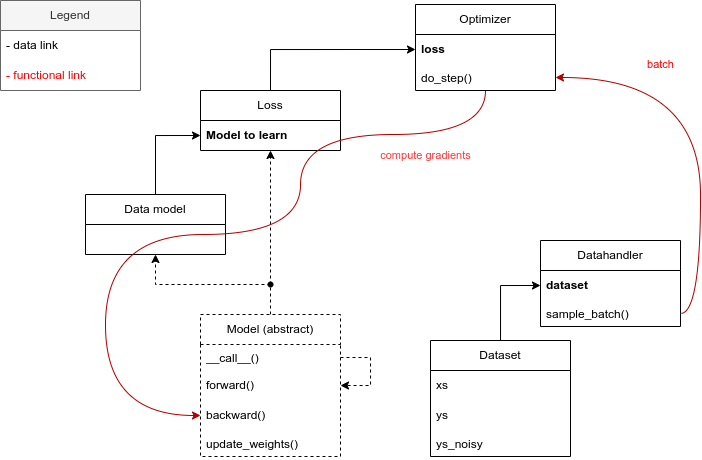

## Data

Here, we generate a simple scalar-to-scalar dataset.
We just take a parabola with some added noise.

### Dataset

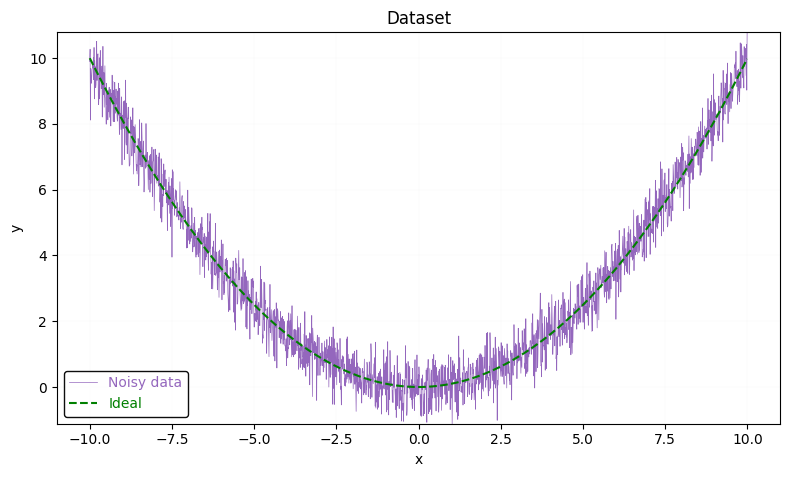

(<Figure size 800x800 with 1 Axes>,
 <Axes: title={'center': 'Dataset'}, xlabel='x', ylabel='y'>)

In [7]:
# !!! All vectors are assumed 1-dimensional, i.e., having shape (dim_vector, )
# !!! When vectors are stacked into a matrix, its shape is assumed
# !!!   (N_vectors, dim_vector)

@dataclass
class DatasetXY:
  xs: np.ndarray
  ys: np.ndarray
  # ys_noisy: Optional[np.ndarray] = field(default_factory=lambda : [])
  ys_noisy: Optional[np.ndarray] = None
  dim_x: Optional[int] = 0
  dim_y: Optional[int] = 0
  len: Optional[int] = 0

  def __post_init__(self):
    assert np.any(self.xs)
    assert np.any(self.ys)

    if not np.any(self.ys_noisy):
      self.ys_noisy = self.ys

    # Ensure ndarray type
    self.xs = np.atleast_1d(self.xs)
    self.ys = np.atleast_1d(self.ys)
    self.ys_noisy = np.atleast_1d(self.ys_noisy)

    # Do dimension determination business ...
    if np.isscalar(self.xs):  # If just one scalar in dataset's xs
      self.len = 1
      self.dim_x = 1
    elif self.xs.ndim == 1: # If xs is a vector
      self.len = len(self.xs)
      self.dim_x = 1
    elif self.xs.ndim == 2: # If a single x is a vector
      self.len = self.xs.shape[0]
      self.dim_x = self.xs.shape[1]

    if np.isscalar(self.ys):
      self.dim_y = 1
    elif self.ys.ndim == 1: # If ys is a vector
      self.dim_y = 1
    elif self.ys.ndim == 2: # If a single y is a vector
      self.dim_y = self.ys.shape[1]

# Generate a dataset
xs = np.arange(-10, 10, 0.01)
noise_mean = 0
noise_std = 0.5
noise_max = 10
noise_min = -10
noise_bounds = repmat( np.array([noise_min, noise_max]),  len(xs), 1)
noises = truncnorm.rvs(
    (noise_bounds[:, 0] - noise_mean) / noise_std ,
     (noise_bounds[:, 1] - noise_mean) / noise_std,
 noise_mean,
 noise_std
 )
ys = 1e-1*xs**2
ys_noisy = ys + noises
dataset = DatasetXY(xs=xs, ys=ys, ys_noisy=ys_noisy)

plot_data(dataset)

### Data handler

In [8]:
class DataHandler:

  def __init__(self, dataset=[], seed=1):
    self.dataset = dataset
    self.seed = seed
    # Fix the seed inside the class
    np.random.seed(1)

  def sample_batch(self, N_samples=1):

    sample_inds = np.sort( np.random.choice(np.arange(self.dataset.len), size=N_samples, replace=False) )

    batch = DatasetXY(
        xs=np.atleast_1d(self.dataset.xs)[sample_inds],
        ys=np.atleast_1d(self.dataset.ys)[sample_inds],
        ys_noisy=np.atleast_1d(self.dataset.ys_noisy)[sample_inds]
        )

    return batch

## Models

First, we define the abstract model class.

In [9]:
class Model(ABC):
  """
  Model blueprint
  """

  @property
  @abstractmethod
  def model_name(self):
      return "model_name"

  @property
  @abstractmethod
  def model_type(self):
      return "model_type"

  @abstractmethod
  def __init__(self):
      pass

  @abstractmethod
  def forward(self):
      pass

  @abstractmethod
  def backward(self):
      pass

  def update_weights(self, new_weights):
      self.weights = new_weights

  def __call__(self, *args):
    return self.forward(*args)

### Model to learn

For the data model, we take a simple 2nd-order model with an optional bias.

In [11]:
class Model2ndOrder(Model):

  model_name = '2nd-order polynomial model'
  model_type = 'data_model'

  def __init__(self, dim_input, dim_output=1, weight_min=-1e2, weight_max=1e2, use_bias=False):
    self.use_bias = use_bias

    # Initialize dimensions and weights.
    # Rule of thumb: small random inits
    core_dim = int((dim_input + 1) * dim_input / 2 + dim_input) # Dimension of regressor core (quad and linear terms)
    if dim_output == 1: # Treating 1 in human terms as 0 in Python's dimensions
      self.shape_weights = core_dim + 1 if self.use_bias else core_dim
      self.weights_init = 1e-2*np.random.rand(self.shape_weights)
    else:
      self.shape_weights = [dim_output, core_dim+1] if self.use_bias else [dim_output, core_dim]
      self.weights_init = 1e-2*np.random.rand(*self.shape_weights)

    self.dim_output = dim_output
    self.weights = self.weights_init

  def forward(self, argin):
    # Model output
    mixterms = np.squeeze(uptria2vec(np.outer(argin, argin)))
    regressor = np.hstack(( mixterms, argin ))

    if self.use_bias:
      return np.matmul(self.weights[:-1], regressor) if self.weights.ndim==1 else np.matmul(self.weights[:,:-1], regressor)
    else:
      return np.matmul(self.weights, regressor)

  def backward(self, argin):
    # Model gradient
    mixterms = np.squeeze( uptria2vec(np.outer(argin, argin)) )
    regressor = np.hstack(( mixterms, argin ))
    gradient = np.squeeze( repmat( regressor, self.dim_output, 1 ) )

    return gradient

#### Exercise: 3rd-order model

Implement, by analogy with `Model2ndOrder`, a model with cubic terms with an optional bias as follows:

$$
\begin{aligned}
& h^\theta: \R^n \ra \R \\
& h^\theta(x) = \theta^\top \left( \begin{array}~
x_1^3 \\ x_2^3 \\ \vdots \\ x_n^3 \\ x_1^2 \\ x_1 x_2 \\ x_1 x_3 \\ \vdots \\ x_2^2 \\ x_2 x_3 \\ \vdots \\ x_1 \\ x_2 \\ \vdots \\ x_n \\ 1
\end{array} \right)
\end{aligned}
$$

Determine the dimensions of the weights $\theta$ vector, implement the forward and backward passes.
Perform testing analogous to [this section](#sec_testing_simple).

In [ ]:
class Model3rdOrder(Model):

  model_name = '3rd-order polynomial model'
  model_type = 'data_model'

  def __init__(self, dim_input, dim_output=1, weight_min=-1e2, weight_max=1e2, use_bias=False):
    self.use_bias = use_bias

    #### YOUR CODE TO INITIALIZE DIMENSIONS AND WEIGHTS

    ####

  def forward(self, argin):

    #### YOUR CODE TO COMPUTE MODEL OUTPUT

    #### REMOVE pass:
    pass

  def backward(self, argin):
    #### YOUR CODE TO COMPUTE MODEL GRADIENT

    #### REMOVE pass:
    pass

#### WRITE YOUR TEST HERE:
print('--------Testing vector-to-scalar 3rd-order model')
model_exercise = Model3rdOrder(dim_input=3, use_bias=False)
#### EXAMPLE ONLY FOR REFERENCE
# print(f'{model_exercise.shape_weights=}')
# print(f'{model_exercise(np.array([2,3,4]))=}')
# print(f'{model_exercise.backward(np.array([2,3,4]))=}')
# assert model_exercise.shape_weights==10 and np.array_equiv(model_exercise.backward(np.array([2,3,4])), np.array([ 4.,  6.,  8.,  9., 12., 16.,  2.,  3.,  4.]) )
# print('PASSED')
####

--------Testing vector-to-scalar 3rd-order model


### Loss

For the running loss, we take an MSE.

In [ ]:
class MeanSqLoss(Model):

  model_name = 'mean_square_loss'
  model_type = 'loss_model'

  def __init__(self, learned_model):
    self.learned_model = learned_model

  def forward(self, dataset):
    # The loss itself evaluated as a sample mean of model error

    sum_sq_error = 0

    for i in range(dataset.len):
      sum_sq_error +=  np.linalg.norm( ( dataset.ys_noisy[i] - self.learned_model( dataset.xs[i] ) ) )**2

    return 1/2 * sum_sq_error / dataset.len

  def backward(self, dataset):
    # Model gradient
    gradient = np.zeros( self.learned_model.shape_weights )

    for i in range(dataset.len):
      gradient -=  np.linalg.norm( ( dataset.ys_noisy[i] - self.learned_model( dataset.xs[i] ) ) ) * self.learned_model.backward( dataset.xs[i] )

    return gradient / dataset.len

#### Exercise: Huber loss

Implement, by analogy with `MeanSqLoss`, Huber loss that reads (for a single input-output pair):

$$
J^\delta_r(\theta, (x, y)) = \begin{cases} \frac 1 2 (h^\theta(x) - y)^2, \text{ if } \abs{h^\theta(x) - y} \le \delta \\
\delta \left( \abs{h^\theta(x) - y} - \frac 1 2 \delta \right), \text{ otherwise} \end{cases}
$$

Perform some basic testing by analogy with [this section](#sec_testing_simple).

In [ ]:
class HuberLoss(Model):

  model_name = 'Huber_loss'
  model_type = 'loss_model'

  def __init__(self, learned_model):
    self.learned_model = learned_model

  def forward(self, dataset):

    #### YOUR CODE TO COMPUTE LOSS

    ####

    return 0

  def backward(self, dataset):

    #### YOUR CODE TO COMPUTE GRADIENT OF LOSS

    ####

    return 0

#### WRITE YOUR TEST HERE:
print('--------Testing Huber loss with scalar model...')
#### EXAMPLE ONLY FOR REFERENCE
model2d_scalar = Model2ndOrder(dim_input=1)
model2d_scalar.update_weights(np.array([2,1]))
Huber_loss_test = HuberLoss(model2d_scalar)
#print(f'{Huber_loss_test(dataset)=}')
#print(f'{Huber_loss_test.backward(dataset)=}')
#assert math.isclose(Huber_loss_test(dataset), 3625.7226916657146, abs_tol=1e-6) and np.allclose(Huber_loss_test.backward(dataset), np.array([-3799.50671709,   -32.38213488]), atol=1e-6 )
#print('PASSED')

--------Testing Huber loss with scalar model...


## Optimizer

This class implements an SGD optimizer.


In [ ]:
class GradientDescentOptimizer:

  def __init__(self, loss = None, learning_rate=0.1, is_adaptive=False):
    if loss.model_type != 'loss_model':
      raise Exception('You need to define a loss function!')
    else:
      self.loss = loss

    self.learning_rate = learning_rate
    self.learning_rate_init = self.learning_rate
    self.iter_counter = 0
    self.is_adaptive = is_adaptive

  def do_step(self, dataset):

    if not isinstance(dataset, DatasetXY):
      raise Exception('You need to provide a dataset to do a learning step!')

    if self.is_adaptive:
      self.learning_rate = self.learning_rate_init * 1 / np.sqrt( self.iter_counter + 1 )
      self.iter_counter += 1

    new_weights = self.loss.learned_model.weights - self.learning_rate * self.loss.backward(dataset)
    self.loss.learned_model.update_weights( new_weights )

  def reset(self):
    self.learning_rate = self.learning_rate_init
    self.iter_counter = 0

### Exercise: momentum SGD

Implement, by analogy with `GradientDescentOptimizer`, a **momentum SGD** which does updates as follows:

> Initialize $\eta>0$, a so called *fading factor*
> - Perform algorithm as the usual SGD but while in iteration $i$ do:
>> - $\theta_{i+1} \la \theta_{i} - \alpha_i \nabla_\theta J_r(\theta_i, d_i) + \eta \vartheta_i$
>> - $ \vartheta_{i+1} \la \eta \vartheta_i - \alpha_i \nabla_\theta J_r(\theta_i, d_i)$

Momentum SGD regularizes the weight updates by tracking and gradually fading weight changes.

In [ ]:
class MomentumGradientDescentOptimizer:

  def __init__(self, loss = None, learning_rate=0.1, fading_factor = 0.9, is_adaptive=False):
    if loss.model_type != 'loss_model':
      raise Exception('You need to define a loss function!')
    else:
      self.loss = loss

    self.learning_rate = learning_rate
    self.learning_rate_init = self.learning_rate
    self.iter_counter = 0
    self.is_adaptive = is_adaptive

    self.fading_factor=fading_factor

  def do_step(self, dataset):

    if not isinstance(dataset, DatasetXY):
      raise Exception('You need to provide a dataset to do a learning step!')

    if self.is_adaptive:
      self.learning_rate = self.learning_rate_init * 1 / np.sqrt( self.iter_counter + 1 )
      self.iter_counter += 1

      #### YOUR CODE TO COMPUTE MOMENTUM UPDATE

      ####

    # UNCOMMENT WHEN SOLUTION WRITTEN
    #self.loss.learned_model.update_weights( new_weights )

  def reset(self):
    self.learning_rate = self.learning_rate_init
    self.iter_counter = 0

<a name="sec_train"></a>
## Training loop

Now do training.

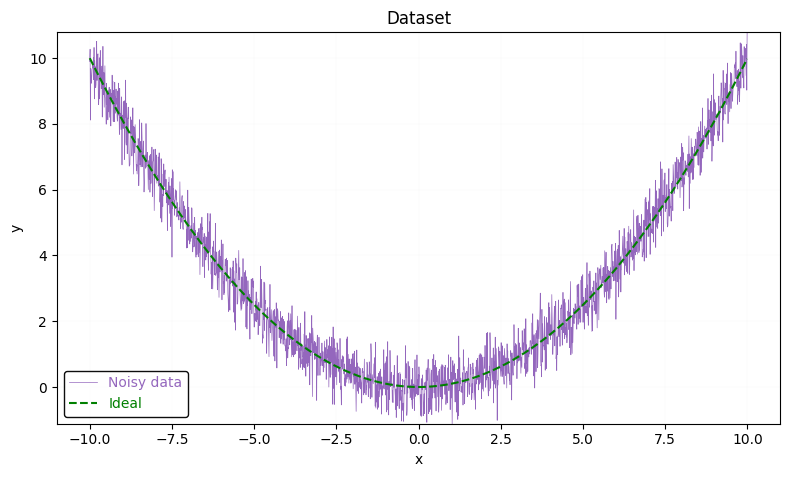

  0%|          | 0/70 [00:00<?, ?it/s]

------------- Step i=0 --------------------------------------------
mse_loss(dataset)=7.984, mse_loss(batch)=2.640, model.weights=array([0.0116911 , 0.00287432])
------------- Step i=1 --------------------------------------------
mse_loss(dataset)=6.685, mse_loss(batch)=4.228, model.weights=array([0.01934617, 0.00288461])
------------- Step i=2 --------------------------------------------
mse_loss(dataset)=5.751, mse_loss(batch)=3.622, model.weights=array([0.02533962, 0.00359108])
------------- Step i=3 --------------------------------------------
mse_loss(dataset)=3.942, mse_loss(batch)=7.180, model.weights=array([0.0385656 , 0.00284398])
------------- Step i=4 --------------------------------------------
mse_loss(dataset)=3.446, mse_loss(batch)=2.712, model.weights=array([0.04271792, 0.00315833])
------------- Step i=5 --------------------------------------------
mse_loss(dataset)=2.841, mse_loss(batch)=2.997, model.weights=array([0.04823839, 0.00294313])
------------- Step i=6 -----

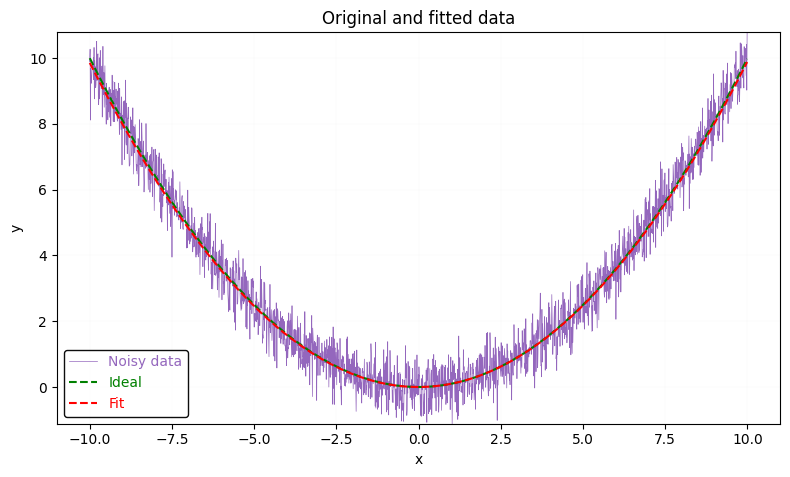

(<Figure size 800x800 with 1 Axes>,
 <Axes: title={'center': 'Original and fitted data'}, xlabel='x', ylabel='y'>,
 array([9.85682133, 9.83709507, 9.81738857, ..., 9.84256326, 9.862295  ,
        9.8820465 ]))

In [ ]:
plot_data(dataset)

# Initialize models
model = Model2ndOrder(dim_input=1)
mse_loss = MeanSqLoss(model)

# Initialize data handler
N_batch_samples = 10
data_handler = DataHandler(dataset)

# Initialize optimizer
N_training_iters = 70
learning_rate = 1e-4
optimizer = GradientDescentOptimizer(mse_loss, learning_rate=learning_rate, is_adaptive=True)

# Training. Notice data model gets updated
for i in tqdm(range(N_training_iters)):
  batch = data_handler.sample_batch( N_batch_samples )
  optimizer.do_step( batch )

  # Print diagnostics
  print(f'------------- Step {i=} --------------------------------------------')
  print(f'{mse_loss(dataset)=:5.3f}, {mse_loss(batch)=:5.3f}, {model.weights=}')

plot_data_fit(dataset, model)

### Exercise: training by momentum SGD

By analogy with [SGD training loop](#sec_train), write your code down below test your implemented momentum SGD.
Compare the results, describe your observations in the box down below after the code block.

**Extra exercise 1**: try out your implemented Huber loss.

**Extra exercise 2 (hard mode)**: generate a new dataset e.g., a noisy cubic curve, take your 3rd-order model and try to train the model on it.

In [ ]:
    #### YOUR TRAINING LOOP CODE

    ####

---
**Your observations from testing momentum SGD**
<pre>









</pre>
---

<a name="sec_testing_simple"></a>
## Testing

This section is needed to test the code for datasets and models.

In [ ]:
print('--------Testing primitive dataset of length 1 ...')
dataset_primitive = DatasetXY(xs=1, ys=2)
print(f'{dataset_primitive.len=}')
print(f'{dataset_primitive.dim_x=}')
print(f'{dataset_primitive.dim_y=}')
assert dataset_primitive.len==1 and dataset_primitive.dim_x==1 and dataset_primitive.dim_y==1
print('PASSED')

print('--------Testing vector-to-scalar dataset ...')
dataset_test_vec2scal = DatasetXY(
    xs = np.array([[1,2],[3,4],[5,6],[7,8]]),
    ys = np.array([9,10,11,12])
    )
print(f'{dataset_test_vec2scal.len=}')
print(f'{dataset_test_vec2scal.dim_x=}')
print(f'{dataset_test_vec2scal.dim_y=}')
assert dataset_test_vec2scal.len==4 and dataset_test_vec2scal.dim_x==2 and dataset_test_vec2scal.dim_y==1
print('PASSED')

print('--------Testing vector-to-vector dataset ...')
dataset_test_vec2vec = DatasetXY(
    xs = np.array([[1,2],[3,4],[5,6],[7,8]]),
    ys = np.array([[9,10],[11,12],[13,14],[15,16]])
    )
print(f'{dataset_test_vec2vec.len=}')
print(f'{dataset_test_vec2vec.dim_x=}')
print(f'{dataset_test_vec2vec.dim_y=}')
assert dataset_test_vec2vec.len==4 and dataset_test_vec2vec.dim_x==2 and dataset_test_vec2vec.dim_y==2
print('PASSED')

print('--------Testing data handler...')
data_handler = DataHandler(dataset_test_vec2vec)
test_batch = data_handler.sample_batch(2)
print(f'{test_batch=}')
assert np.array_equiv(test_batch.xs, np.array([[5, 6], [7, 8]]) )
print('PASSED')

print('--------Testing scalar model...')
model2d_scalar = Model2ndOrder(dim_input=1)
model2d_scalar.update_weights(np.array([2,1]))
print(f'{model2d_scalar.shape_weights=}')
print(f'{model2d_scalar(2.0)=}')
print(f'{model2d_scalar.backward(2.0)=}')
assert model2d_scalar.shape_weights==2 and model2d_scalar(2.0)==10.0 and np.array_equiv(model2d_scalar.backward(2.0), np.array([4.0, 2.0]) )
print('PASSED')

print('--------Testing vector-to-scalar model with bias...')
model2d_vec2scal = Model2ndOrder(dim_input=3, use_bias=True)
print(f'{model2d_vec2scal.shape_weights=}')
print(f'{model2d_vec2scal(np.array([2,3,4]))=}')
print(f'{model2d_vec2scal.backward(np.array([2,3,4]))=}')
assert model2d_vec2scal.shape_weights==10 and np.array_equiv(model2d_vec2scal.backward(np.array([2,3,4])), np.array([ 4.,  6.,  8.,  9., 12., 16.,  2.,  3.,  4.]) )
print('PASSED')

print('--------Testing vector-to-vector model with bias...')
model2d_vec2vec = Model2ndOrder(dim_input=2, dim_output=2, use_bias=True)
print(f'{model2d_vec2vec.shape_weights=}')
print(f'{model2d_vec2vec(np.array([1,2]))=}')
print(f'{model2d_vec2vec.backward(np.array([1,2]))=}')
assert model2d_vec2scal.shape_weights==10 and np.array_equiv(model2d_vec2scal.backward(np.array([1,2])), np.array([ [[1., 2., 4., 1., 2.], [1., 2., 4., 1., 2.]]]) )
print('PASSED')

print('--------Testing loss with scalar model...')
mse_loss_test = MeanSqLoss(model2d_scalar)
print(f'{mse_loss_test(dataset)=}')
print(f'{mse_loss_test.backward(dataset)=}')
assert math.isclose(mse_loss_test(dataset), 3624., abs_tol=1.) and np.allclose(mse_loss_test.backward(dataset), np.array([-3798.,   -32.]), atol=1. )
print('PASSED')

--------Testing primitive dataset of length 1 ...
dataset_primitive.len=1
dataset_primitive.dim_x=1
dataset_primitive.dim_y=1
PASSED
--------Testing vector-to-scalar dataset ...
dataset_test_vec2scal.len=4
dataset_test_vec2scal.dim_x=2
dataset_test_vec2scal.dim_y=1
PASSED
--------Testing vector-to-vector dataset ...
dataset_test_vec2vec.len=4
dataset_test_vec2vec.dim_x=2
dataset_test_vec2vec.dim_y=2
PASSED
--------Testing data handler...
test_batch=DatasetXY(xs=array([[5, 6],
       [7, 8]]), ys=array([[13, 14],
       [15, 16]]), ys_noisy=array([[13, 14],
       [15, 16]]), dim_x=2, dim_y=2, len=2)
PASSED
--------Testing scalar model...
model2d_scalar.shape_weights=2
model2d_scalar(2.0)=10.0
model2d_scalar.backward(2.0)=array([4., 2.])
PASSED
--------Testing vector-to-scalar model with bias...
model2d_vec2scal.shape_weights=10
model2d_vec2scal(np.array([2,3,4]))=0.22835317330034724
model2d_vec2scal.backward(np.array([2,3,4]))=array([ 4.,  6.,  8.,  9., 12., 16.,  2.,  3.,  4.])
PASSED

# Example using torch

In the implementation above, we had to code gradient computations via `backward` methods manually.
There are actually many tools that do this automatically.
It is called *automatic differentiation*.
The most popular data science tools utilizing are `TensorFlow` and `torch`.
In this section, we will use the latter, although the idea is easily transferrable to other frameworks.
What `torch` also does for us is that it optimizes the computations via removing redundant ones.
This is called *computational graph optimization*.

## Torch preamble

Run this preamble before proceeding to the `torch` example.

In [ ]:
import torch
import torch.nn as nn
print("Using torch", torch.__version__)

from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split

def set_torch_seed(seed=1):
  random.seed(seed)
  os.environ['PYTHONHASHSEED'] = str(seed)
  np.random.seed(seed)
  torch.manual_seed(seed)
  torch.cuda.manual_seed(seed)
  torch.cuda.manual_seed_all(seed) # When using multi-GPU
  torch.backends.cudnn.benchmark = False
  torch.backends.cudnn.deterministic = True

set_torch_seed(1)

Using torch 2.0.1+cu118


## Dataset

Generate a dataset as before, but now using `torch`.

In [ ]:
class TorchDatasetXY(Dataset):

  def __init__(self, xs=None, ys=None, ys_noisy=None):
    assert torch.is_tensor(xs)
    assert torch.is_tensor(ys)
    assert torch.any(xs)
    assert torch.any(ys)

    self.xs = xs
    self.ys = ys

    if ys_noisy is None:
      self.ys_noisy = ys
    else:
      self.ys_noisy = ys_noisy

  def __len__(self):
    return len(self.xs)

  def __getitem__(self, idx):
    return (self.xs[idx], self.ys[idx], self.ys_noisy[idx])

xs = torch.arange(-10, 10, 0.01)
noise_mean = torch.tensor(0.)
noise_std = torch.tensor(0.5)
noise_max = torch.tensor(10.)
noise_min = torch.tensor(-10.)
noises = torch.normal(mean = noise_mean.repeat(len(xs)), std=noise_std.repeat(len(xs)))
ys = 1e-1*xs**2
ys_noisy = ys + noises

dataset_torch = TorchDatasetXY(xs=xs, ys=ys, ys_noisy=ys_noisy)

# plot_data(dataset_torch)

## Model, training

Implementing models is now super easy.
The role of the former data handler will be played by the `torch`'s `DataLoader`, which is quite handy.

  0%|          | 0/60 [00:00<?, ?it/s]

loss_num=array(0.3219279, dtype=float32)


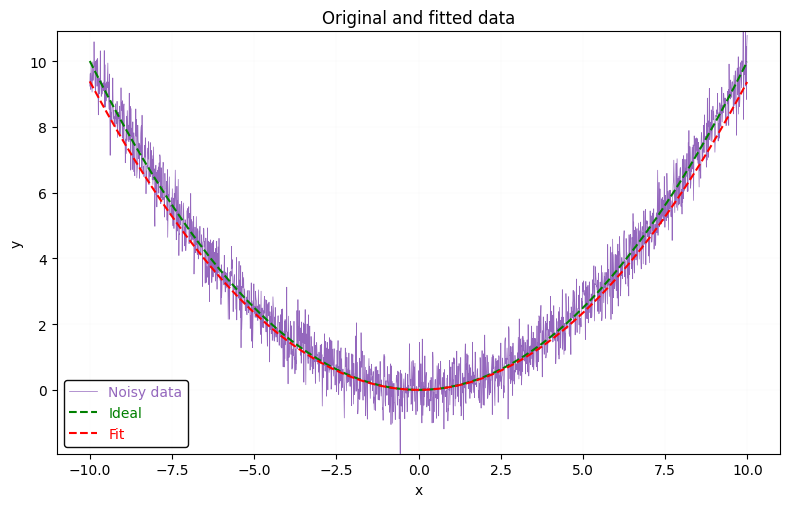

(<Figure size 800x800 with 1 Axes>,
 <Axes: title={'center': 'Original and fitted data'}, xlabel='x', ylabel='y'>,
 array([9.381287 , 9.362533 , 9.343799 , ..., 9.325085 , 9.3438015,
        9.362533 ], dtype=float32))

In [ ]:
xs_train, xs_test, ys_train, ys_test = train_test_split(dataset_torch.xs, dataset_torch.ys_noisy, train_size=0.6, shuffle=True)
dataset_train = TorchDatasetXY(xs=xs_train, ys=ys_train)

N_batch_samples = 40
data_loader = DataLoader(dataset_train, shuffle=True, batch_size=N_batch_samples, worker_init_fn=np.random.seed(1))

# Custom layer: quadratic
class LayerSquare(nn.Module):
    def forward(self, x):
        return torch.square(x)

# Torch model with a linear 1-to-2 layer, then a ReLU, then a linear 2-to-2
# layer followed by another ReLU, then a linear 2-to-1 to match the output,
# and finally a sigmoid applied to it
model_nn = nn.Sequential(
    nn.Linear(1, 1, bias=False),
    # nn.ReLU(),
    # nn.Linear(2, 2),
    # nn.ReLU(),
    LayerSquare(),
    # nn.Linear(3, 1, bias=False),
    # nn.Sigmoid()
)

N_epochs = 60

mse_loss = nn.MSELoss()

torch_optimizer = torch.optim.SGD(model_nn.parameters(), lr=0.001)

# Train model
model_nn.train()
for epoch in tqdm(range(N_epochs)):
    for xs_batch, ys_batch, ys_noisy_batch in data_loader:
      # print(f'{xs_batch=}')
      # Reshape the x-batch into a column vector for compatibility with the linear layer
      ys_pred = torch.squeeze( model_nn( torch.unsqueeze( xs_batch, 1 ) ) )
      loss = mse_loss(ys_pred, ys_noisy_batch)
      torch_optimizer.zero_grad() # Set gradients to zero
      loss.backward() # Compute gradients
      torch_optimizer.step() # Do a gradient descent step

# Evaluate the model
model_nn.eval()
ys_pred = torch.squeeze( model_nn( torch.unsqueeze( xs_test, 1 ) ) )
loss_num = mse_loss(ys_pred, ys_test).detach().numpy()
print(f'{loss_num=}')

dir()

plot_data_fit(dataset_torch, model_nn, is_torch=True)

<a name="sec_testing_torch"></a>
## Testing

This is just a sandbox to do some testing of the models and data loaders.

In [ ]:
print(f'{type(model_nn)=}')

t = torch.tensor([[1,2],[3,4],[5,6],[7,8]])
s = torch.tensor(2.)

print(f'{t=}, {t.shape=}, {t[1]=}')
print(f'{s=}, {s.shape=}')
print(f'{s.repeat(3)=}, {s.repeat(3).shape=}')
print(f'{len(t)=}')

print(f'{t.numpy()=}')

for xs_batch, ys_batch, ys_noisy_batch in data_loader:
    print(f'{xs_batch=}, {ys_batch=}')
    print(f'Transforming into 2d: {torch.atleast_2d(xs_batch)=}, its shape: {torch.atleast_2d(xs_batch).shape=}')
    print(f'Using unsqueeze: {torch.unsqueeze(xs_batch, 1)=}, its shape: {torch.unsqueeze(xs_batch, 1).shape=}')
    print(f'Shapes: {xs_batch.shape=} {xs_batch.t().shape=}')
    break

type(model_nn)=<class 'torch.nn.modules.container.Sequential'>
t=tensor([[1, 2],
        [3, 4],
        [5, 6],
        [7, 8]]), t.shape=torch.Size([4, 2]), t[1]=tensor([3, 4])
s=tensor(2.), s.shape=torch.Size([])
s.repeat(3)=tensor([2., 2., 2.]), s.repeat(3).shape=torch.Size([3])
len(t)=4
t.numpy()=array([[1, 2],
       [3, 4],
       [5, 6],
       [7, 8]])
xs_batch=tensor([ 8.4500, -7.5400, -6.0800, -0.3900,  2.7200,  6.0800, -8.7100,  6.2100,
        -6.2900,  8.3300, -5.4500, -1.2900, -9.5800, -2.5100,  5.1100,  5.7100,
        -7.2300,  4.8100, -6.4000, -5.0200, -5.2500,  6.1200, -4.1400, -8.1800,
        -4.9200,  1.4300,  9.1300, -2.4000,  9.0600, -6.7200,  9.3700,  9.6600,
         3.5800, -7.8800, -9.9800,  8.1700,  5.8000,  9.9500,  8.6900, -8.8600]), ys_batch=tensor([ 7.6634,  5.5703,  3.5610, -0.0947, -0.8869,  4.2042,  6.6982,  3.7612,
         3.2640,  6.7165,  2.4242,  0.7080,  9.0987,  0.7654,  2.3579,  3.4886,
         5.2106,  1.9578,  4.5226,  2.4487,  2.4861,  4.

# New Section